In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics


BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

### UPDRS total

In [3]:
np.unique(df_all["sub"])

array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 13, 14], dtype=int64)

In [4]:
# hypothesis here: Mean Con and mean ips correlated negatively with UPDRS_tot
r2_ECOG = []
r2_STN = []
UPDRS_tot = []
for sub in np.unique(df_all["sub"]):
    r2_ECOG.append(np.mean([df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["r2_con"].mean(),
             df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["r2_ips"].mean()]))
    r2_STN.append(np.mean([df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_con"].mean(),
             df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_ips"].mean()]))
    UPDRS_tot.append(df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["UPDRS_total"].mean())


In [5]:
r2_ECOG

[0.4789592468333333,
 0.1821612881428571,
 0.13281589924999998,
 0.07366119990625,
 0.09594195614062499,
 0.008926757833333333,
 0.09323032149999999,
 0.014857093166666668,
 0.036876952125,
 0.03345566975,
 0.027939104833333332]

In [6]:
stats.ttest_ind(np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][6:])

Ttest_indResult(statistic=1.5884476631352276, pvalue=0.15084783642718363)

In [7]:
stats.ttest_ind(np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][6:])

Ttest_indResult(statistic=1.288353256499087, pvalue=0.23363281379288026)

In [8]:
stats.ranksums(np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][6:])

RanksumsResult(statistic=1.775592090748118, pvalue=0.07580017458236125)

In [9]:
stats.ranksums(np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][6:])

RanksumsResult(statistic=1.8800386843215366, pvalue=0.06010280593886631)

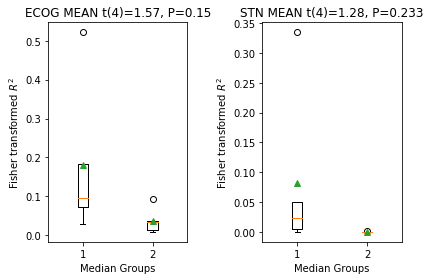

In [88]:
plt.subplot(121)
plt.boxplot([np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][:5],
    np.arctanh(r2_ECOG)[np.argsort(UPDRS_tot)][6:]], showmeans=True)
plt.title("ECOG MEAN t(4)=1.57, P=0.15")
plt.ylabel("Fisher transformed "+r"$R^2$")
plt.xlabel("Median Groups")
plt.subplot(122)
plt.boxplot([np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][:5],
    np.arctanh(r2_STN)[np.argsort(UPDRS_tot)][6:]], showmeans=True)
plt.title("STN MEAN t(4)=1.28, P=0.233")
plt.ylabel("Fisher transformed "+r"$R^2$")
plt.xlabel("Median Groups")
plt.tight_layout()
plt.show()

### Mean Split Best

In [11]:
# hypothesis here: Mean Con and mean ips correlated negatively with UPDRS_tot
r2_ECOG_MAX = []
r2_STN_MAX = []
UPDRS_tot = []
for sub in np.unique(df_all["sub"]):
    r2_ECOG_MAX.append(np.mean([df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["r2_con"].max(),
             df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["r2_ips"].max()]))
    r2_STN_MAX.append(np.mean([df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_con"].max(),
             df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_ips"].max()]))
    UPDRS_tot.append(df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["UPDRS_total"].mean())


In [12]:
stats.ttest_ind(np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][6:])

Ttest_indResult(statistic=2.0537965749497427, pvalue=0.07407021257737328)

In [13]:
stats.ttest_ind(np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][6:])

Ttest_indResult(statistic=1.7789784667833495, pvalue=0.11312663147042247)

In [14]:
stats.ranksums(np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][6:])

RanksumsResult(statistic=1.9844852778949553, pvalue=0.04720176769014221)

In [15]:
stats.ranksums(np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][:5],
np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][6:])

RanksumsResult(statistic=1.8800386843215366, pvalue=0.06010280593886631)

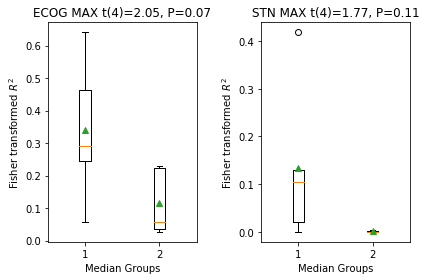

In [16]:
plt.subplot(121)
plt.boxplot([np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][:5],
    np.arctanh(r2_ECOG_MAX)[np.argsort(UPDRS_tot)][6:]], showmeans=True)
plt.title("ECOG MAX t(4)=2.05, P=0.07")
plt.ylabel("Fisher transformed "+r"$R^2$")
plt.xlabel("Median Groups")
plt.subplot(122)
plt.boxplot([np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][:5],
    np.arctanh(r2_STN_MAX)[np.argsort(UPDRS_tot)][6:]], showmeans=True)
plt.title("STN MAX t(4)=1.77, P=0.11")
plt.ylabel("Fisher transformed "+r"$R^2$")
plt.xlabel("Median Groups")
plt.tight_layout()
plt.show()

### Mean of ECOG and STN UPDRS analysis

In [52]:
# hypothesis here: Mean Con and mean ips correlated negatively with UPDRS_tot
r2_ECOG = []
r2_STN = []
UPDRS_tot = []
for sub in np.unique(df_all["sub"]):
    r2_ECOG.append(np.mean([df_all[(df_all["sub"] == sub)]["r2_con"].mean(),
             df_all[(df_all["sub"] == sub)]["r2_ips"].mean()]))
    r2_STN.append(np.mean([df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_con"].mean(),
             df_all[(df_all["sub"] == sub)&(df_all["loc"]=="STN")]["r2_ips"].mean()]))
    UPDRS_tot.append(df_all[(df_all["sub"] == sub)&(df_all["loc"]=="ECOG")]["UPDRS_total"].mean())


In [62]:
df_ = pd.DataFrame()
df_["r2_ECOG"] = r2_ECOG#np.arctanh(r2_ECOG)
df_["r2_STN"] = np.arctanh(r2_STN)
df_["UPDRS_tot"] = UPDRS_tot

In [63]:
model = smf.ols("r2_ECOG~UPDRS_tot", data=df_)
results = model.fit()
print(stats.spearmanr(np.arctanh(r2_ECOG), df_["UPDRS_tot"]))
print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                r2_ECOG   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     3.463
Date:                Sat, 03 Oct 2020   Prob (F-statistic):             0.0957
Time:                        15:54:13   Log-Likelihood:                 8.7784
No. Observations:                  11   AIC:                            -13.56
Df Residuals:                       9   BIC:                            -12.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [58]:
df_["r2_ECOG"]

0     0.426929
1     0.166800
2     0.111111
3     0.067124
4     0.088087
5     0.006462
6     0.062154
7     0.009905
8     0.024722
9     0.022304
10    0.018626
Name: r2_ECOG, dtype: float64

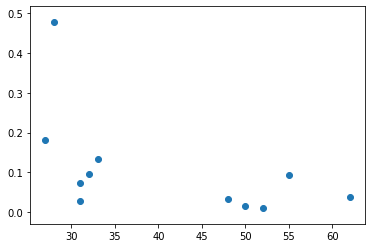

In [42]:
plt.scatter(df_["UPDRS_tot"], df_["r2_ECOG"])